## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns',100)
import datetime as dt

### Load Data

In [2]:
data = pd.read_csv('train.csv')
print(data.shape)
data.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 978.1+ KB


### Checking for missing value

In [4]:
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [5]:
categorical_features = ['season','weather','holiday','workingday']
continous_features = ['temp','atemp','humidity','windspeed','casual','registered','count']
for col in categorical_features:
    data[col] = data[col].astype('category')

data.describe(include='all')


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-03-14 20:00:00,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


## EDA and Feature Engineering

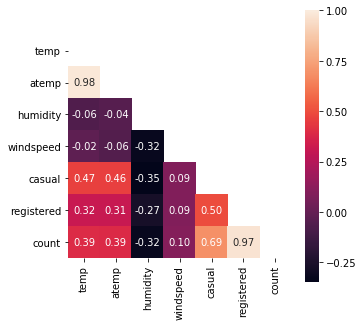

In [6]:
cor_mat = data[continous_features].corr()
mask = np.zeros_like(cor_mat)
mask[np.triu_indices_from(mask)] = True
fig = plt.figure(figsize=(5,5))
sns.heatmap(cor_mat,mask=mask,square=True,annot=True,fmt='.2f')

Important observations:

1. casual, registered, total user count have high correlation with temp, atemp, humidity
2. registered+casual = count. So their correlation with count is high as obvious
3. Windspeed has very weak correlation with count
4. It has been observed many zeros (almost 12% of total rows) which is not possible in real case. We need to develop some strategy to fill this 0's

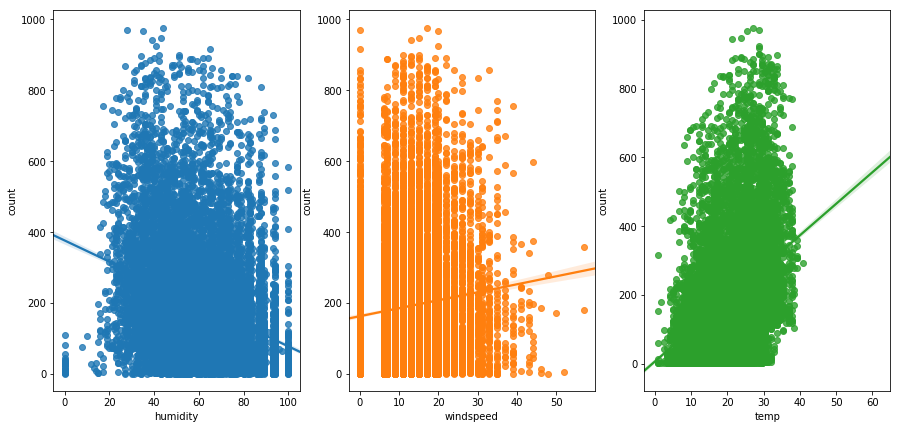

In [7]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,7))
sns.regplot(x='humidity',y='count',data=data, ax=ax1)
sns.regplot(x='windspeed',y='count',data=data, ax=ax2)
sns.regplot(x='temp',y='count',data=data, ax=ax3)

In [8]:
data[data['windspeed']==0].shape[0]/data.shape[0]

0.12061363218813155

### Extract features from datetime column

In [9]:
data['datetime'] = pd.to_datetime(data['datetime'])
data.sort_values('datetime', ascending = True, inplace=True)
data['month'] = data['datetime'].dt.month
data['weekday'] = data['datetime'].dt.dayofweek
data['hour'] = data['datetime'].dt.hour
data['year'] = data['datetime'].dt.year

These features can be considered as categorical features too.

### EDA for categorical features

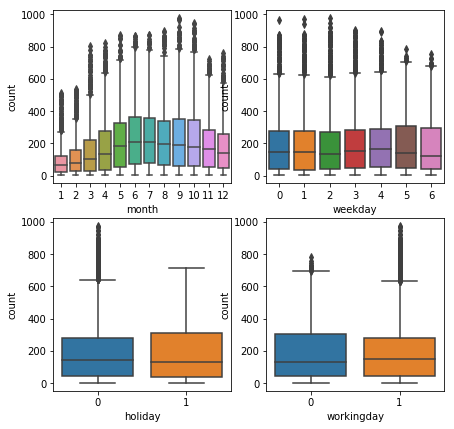

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(7,7))
sns.boxplot(data = data, x='month',y='count', ax=ax1)
sns.boxplot(data = data, x='weekday',y='count', ax=ax2)
sns.boxplot(data = data, x='holiday', y='count', ax=ax3)
sns.boxplot(data = data, x='workingday',y='count', ax=ax4)

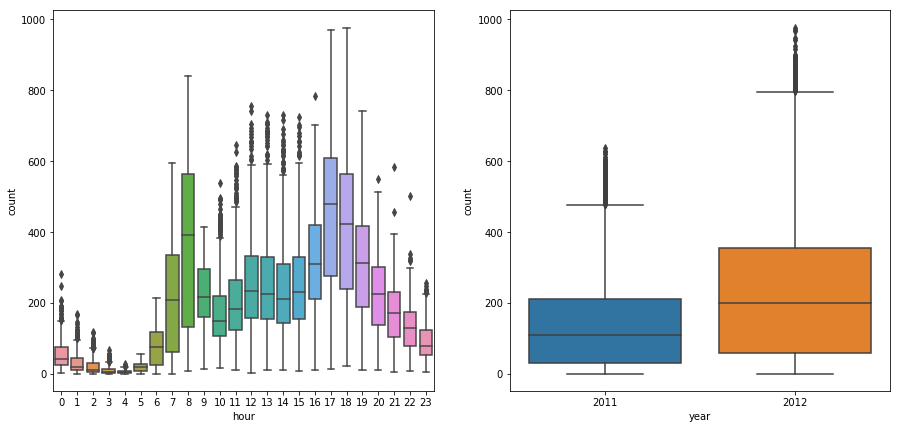

In [11]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,7))
sns.boxplot(data=data, x='hour',y='count', ax =ax1)
sns.boxplot(data=data, x='year',y='count', ax =ax2)

Observations:
1. User count seems high during June to october than remaining months. It's because of summer season. It will get verified in further EDA
2. Usercount outliers are more during working day than holiday. It can be easily observed from remaining 3 graphs.
3. During Early morning (6:00 to 8:00) and late afternoon(4:00 to 6:00) the usercount increasing as it could be because people might use it for commuting workplace, school, exercise etc.
4. looking at yearwise plot it shows increase in count with year

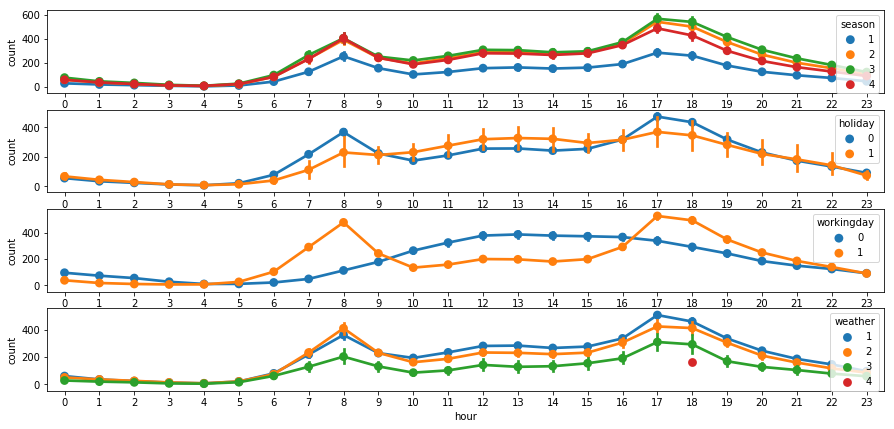

In [12]:

fig, (ax1,ax2,ax3,ax4) =  plt.subplots(4,1, figsize=(15,7))

sns.pointplot(data=data, x='hour',y = 'count', hue='season',join=True, ax= ax1) # 1 = spring, 2 = summer, 3 = fall, 4 = winter 
sns.pointplot(data=data, x='hour',y = 'count', hue='holiday',join=True, ax= ax2)
sns.pointplot(data=data, x='hour',y = 'count', hue='workingday',join=True, ax= ax3)
sns.pointplot(data=data, x='hour',y = 'count', hue='weather',join=True, ax= ax4)


Observations:

1. central tendency at each hour during holiday season is high during 10:00 to 4:00.
2. As weather get worst, count goes lower.(Note: 1. Best weather 4. worst weather)

### Filling 0 windspeed

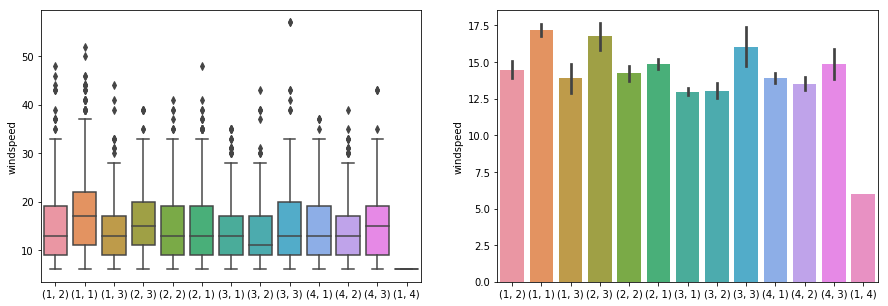

In [13]:
windnot0 = data[data['windspeed'] != 0][['season','weather','windspeed']]
windnot0.set_index(['season','weather'],inplace=True)

fig,(ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(x=windnot0.index,y='windspeed',data=windnot0 , ax= ax1)
sns.barplot(x=windnot0.index,y='windspeed',data=windnot0 , ax= ax2)

In [14]:
wind_df = pd.pivot_table(windnot0 ,values='windspeed',index=['season','weather'],aggfunc=[np.mean,np.median])
wind_df

mean    median
                windspeed windspeed
season weather                     
1      1        17.191688   16.9979
       2        14.455551   12.9980
       3        13.883184   12.9980
       4         6.003200    6.0032
2      1        14.866625   12.9980
       2        14.235828   12.9980
       3        16.753620   15.0013
3      1        12.960874   12.9980
       2        13.002210   11.0014
       3        16.011428   12.9980
4      1        13.896739   12.9980
       2        13.521244   12.9980
       3        14.860406   15.0013

In [15]:
# lets replace 0 windspeed with median windspeed of ('season', 'weather')
def replacezero(row):
    if row['windspeed'] == 0:
        s = row['season']
        w = row['weather']
        return wind_df.loc[(s,w),('median','windspeed')]
    else:
        return row['windspeed']
    
data['windspeed'] = data.apply(replacezero,axis=1)


### Removing outliers from data

Removing the rows based on count column with z-score greater than 3

In [16]:
datanooutliers = data[(np.abs(data['count'] - data['count'].mean())/data['count'].std()) <= 3]
data.shape, datanooutliers.shape

((10886, 16), (10739, 16))

### Dealing with skewness in user count

it's better to choose log transform which approximate normalized distribution to some extent but not exactly

((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([1.        , 1.        , 1.        , ..., 9.01232878, 9.01643089,
         9.02052927])),
 (1.9570606029927227, 5.005226978094466, 0.9872917450205))

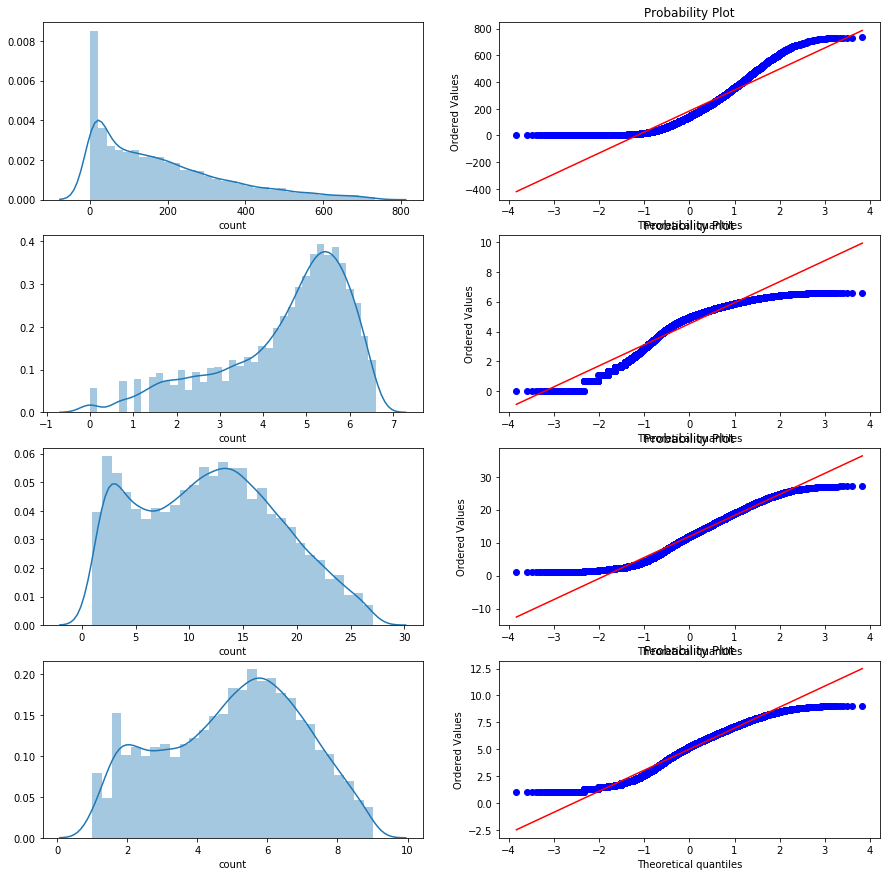

In [17]:
import scipy.stats as stats

fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2,figsize=(15,15))

sns.distplot(datanooutliers['count'], ax = ax1)
stats.probplot(datanooutliers["count"], dist='norm', fit=True, plot=ax2)

sns.distplot(np.log(datanooutliers['count']),ax=ax3)
stats.probplot(np.log(datanooutliers["count"]), dist='norm', fit=True, plot=ax4)

sns.distplot(np.sqrt(datanooutliers['count']),ax=ax5)
stats.probplot(np.sqrt(datanooutliers["count"]), dist='norm', fit=True, plot=ax6)

sns.distplot(np.power(datanooutliers['count'],1/3),ax=ax7)
stats.probplot(np.power(datanooutliers['count'],1/3), dist='norm', fit=True, plot=ax8)


### Summary of EDA and feature engineering

EDA lead us to useful strategies to develop our possible feature set
* Month,weekday,hour,year are extracted from datetime during EDA. 
* Transform hour to session 
* Drop 'datetime' column    
* Drop casual and registered columns as they cause data leakage
* Replace 0 windspeed with appropriate value defined by our previous strategy
* Remove outliers from train data
* Apply log transformation to 'count' column 

In [18]:
def transform_feature(df):
    
    df['datetime'] = pd.to_datetime(df['datetime'])
    
    # include 'year' column
    df['year'] = df['datetime'].dt.year
    df['dayofweek'] = df['datetime'].dt.dayofweek

    # Hour to session conversion
    df['hour'] = df['datetime'].dt.hour
    
    label_names = ['Mid-Night','Morning','Afternoon','Evening']
    cutpoints = [-1,6,12,18,24]
    df['session'] = pd.cut(df['hour'],cutpoints,labels=label_names,right=True)
    
    # replace 0 windspeed
    df['windspeed'] = df.apply(replacezero,axis=1)
    
    # removing unnecessary columns
    if 'casual' in df.columns:
        df.drop(['datetime','casual','registered'], axis= 1, inplace= True)
    else:
        df.drop(['datetime'], axis= 1, inplace= True)
    
    
    # 1 = spring, 2 = summer, 3 = fall, 4 = winter 
    df['season'] = df['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
    
    #one hot encoding to categorical features
    categoricals = ['season','weather','session']    
    
    dummy_df = pd.DataFrame()
    
    for col in categoricals:
        dummy_df = pd.get_dummies(df[col])
        df = pd.concat([df,dummy_df],axis=1)
        del df[col]    
    
    
    return df

original = pd.read_csv('train.csv')
processed = transform_feature(original)


# Removing outliers
processed = processed[(np.abs(processed['count'] - processed['count'].mean())/processed['count'].std()) <= 3]

# Transform count column
processed['count'] = np.log1p(processed['count'])
processed.head()


,holiday,workingday,temp,atemp,humidity,windspeed,count,year,dayofweek,hour,fall,spring,summer,winter,1,2,3,4,Mid-Night,Morning,Afternoon,Evening
0,0,0,9.84,14.395,81,16.9979,2.833213,2011,5,0,0,1,0,0,1,0,0,0,1,0,0,0
1,0,0,9.02,13.635,80,16.9979,3.713572,2011,5,1,0,1,0,0,1,0,0,0,1,0,0,0
2,0,0,9.02,13.635,80,16.9979,3.496508,2011,5,2,0,1,0,0,1,0,0,0,1,0,0,0
3,0,0,9.84,14.395,75,16.9979,2.639057,2011,5,3,0,1,0,0,1,0,0,0,1,0,0,0
4,0,0,9.84,14.395,75,16.9979,0.693147,2011,5,4,0,1,0,0,1,0,0,0,1,0,0,0


## Feature Selection

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

rf = RandomForestRegressor(random_state = 1)
selector = RFECV(rf,cv=5, scoring = 'neg_mean_squared_log_error')

features = list(processed.columns)
features.remove('count')

selector.fit(processed[features],processed['count'])

optimized_cols = processed[features].columns[selector.support_]

optimized_cols

Index([   'holiday', 'workingday',       'temp',      'atemp',   'humidity',
        'windspeed',       'year',  'dayofweek',       'hour',       'fall',
           'spring',     'summer',     'winter',            1,            2,
                  3,  'Mid-Night',  'Afternoon',    'Evening'],
      dtype='object')

## Choosing model

We will try out linear regression, decision tree, random forest regressor, grdientboost regressor for given problem. Best model will be chosen based on lowest RMSLE(Root mean squre log error).

In [20]:
# importing ML models and performance metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer
from math import sqrt
from sklearn.neural_network import MLPRegressor

In [21]:
def select_model(df, features):
    
    all_X = df[features]
    all_y = df['count']

    models = [
              
              {
               "name": "Decision Tree",
               "estimator": DecisionTreeRegressor(random_state=1),
               "hyperparameters": {'criterion': ["mse", "friedman_mse", "mae"],
                                 'min_samples_leaf': [1,3 ,5],
                                 'min_samples_split': [2,4,6]
                                 }
              },
              
              {
               "name": "Random Forest",
               "estimator":RandomForestRegressor(random_state=1),
               "hyperparameters": {'n_estimators':[500,1000],
                                   'criterion':['mse'],
                                   'min_samples_leaf': [1,3],
                                   'min_samples_split': [2,4],
                                   'n_jobs' : [-1]
                                   }
              },
              
              {
               "name": "Gradient Boost",
               "estimator":GradientBoostingRegressor(random_state=1),
               "hyperparameters":{'n_estimators': [500]}
                  
              },
              {
                "name": "MLP Regressor",
                "estimator":MLPRegressor(random_state=1),
                "hyperparameters":{'hidden_layer_sizes': [(25,25),(50,50)]}
              
              }
        
            ]
    
    
    def rmsle(y_test,pred):
        y = np.exp(y_test)-1
        y_ = np.exp(pred)-1
        msle = mean_squared_log_error(y_true = y,y_pred=y_)
        return sqrt(msle)
    
    rmsle_scoring = make_scorer(rmsle,greater_is_better = False)
    
    for model in models:
        print(model['name'])
        print('*'*len(model['name']))    
        
        grid = GridSearchCV(model['estimator'], param_grid=model['hyperparameters'], scoring=rmsle_scoring, cv=5)
        grid.fit(all_X,all_y)
        
        pred = grid.predict(all_X)
        pred = [max(0,p) for p in pred]
        
        model["best_params"] = grid.best_params_
#         model['best_score'] = grid.best_score_
        model['best_model'] = grid.best_estimator_

        error = rmsle(all_y,pred)
        
        print('RMSLE Score for best model: {:.4f}'.format(error))
        print('Best Params:{}\n'.format(model['best_params']))
        
    return models
        
        

In [22]:
final = select_model(processed,optimized_cols)  

Decision Tree
*************
RMSLE Score for best model: 0.2440
Best Params:{'criterion': 'mse', 'min_samples_leaf': 5, 'min_samples_split': 2}

Random Forest
*************
RMSLE Score for best model: 0.1123
Best Params:{'criterion': 'mse', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000, 'n_jobs': -1}

Gradient Boost
**************
RMSLE Score for best model: 0.2765
Best Params:{'n_estimators': 500}

MLP Regressor
*************
RMSLE Score for best model: 0.7904
Best Params:{'hidden_layer_sizes': (25, 25)}



## Evaluating on test data

In [23]:
holdout_orig = pd.read_csv('test.csv')
datetime = holdout_orig['datetime']

In [24]:

holdout = transform_feature(holdout_orig)

def save_submission_file(holdout, features, model, filename="submission.csv"):
    
    holdout_data = holdout[features]
    predictions = model.predict(holdout_data)
    predictions = np.exp(predictions)
    predictions = [max(0,p) for p in predictions]
    
    holdout_ids = datetime
    submission_df = {"datetime": holdout_ids,
                 "count": predictions}
    submission = pd.DataFrame(submission_df)

    submission.to_csv(filename,index=False)

best_rf_model = final[2]["best_model"]
save_submission_file(holdout, optimized_cols, best_rf_model)



* **RMSLE test score : 0.38002** 
* **Ranking on the leaderboard is in top 5%**